<a href="https://colab.research.google.com/github/Paguiar735/capstone_project_computer_vision_by_ifam/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 00 - All functions are defined here

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from imutils import url_to_image


def fun_get_pictures_from_url(i_var_url):
  i_var_img_content = url_to_image(i_var_url)
  i_var_img_content_numpy_array = np.array(i_var_img_content)
  return i_var_img_content_numpy_array


def fun_get_image_180_hsv_from_rgb(i_var_img_rgb):
  i_var_img_hsv = cv2.cvtColor(i_var_img_rgb, cv2.COLOR_BGR2HSV)
  return i_var_img_hsv


def fun_get_range_180_hsv_color_interval(i_var_360_hsv_color_angle, i_var_hue_deviation = 20):
  i_var_angle = i_var_360_hsv_color_angle / 2
  i_var_180_hsv_range_upper_bound = np.array([i_var_angle + i_var_hue_deviation, 255, 255])
  i_var_180_hsv_range_lower_bound = np.array([i_var_angle - i_var_hue_deviation, 100, 100])
  return i_var_180_hsv_range_lower_bound, i_var_180_hsv_range_upper_bound


def fun_get_contours(
    i_var_img_hsv,
    i_var_180_hsv_range_lower_bound,
    i_var_180_hsv_range_upper_bound,
    i_var_rectangle_color = (255, 255, 255),
    i_var_rectangle_thickness = 2,
    i_var_rectangle_min_area = 1
  ):

  i_var_color_mask = cv2.inRange(
      i_var_img_hsv,
      i_var_180_hsv_range_lower_bound,
      i_var_180_hsv_range_upper_bound
  )

  (i_var_img_contours, _) = cv2.findContours(
      i_var_color_mask,
      cv2.RETR_TREE,
      cv2.CHAIN_APPROX_SIMPLE
  )
  
  for i_var_img_contour in i_var_img_contours:
    i_var_contour_area = cv2.contourArea(i_var_img_contour)
    if (i_var_contour_area > i_var_rectangle_min_area):
        x,y,w,h = cv2.boundingRect(i_var_img_contour)
        cv2.rectangle(
            i_var_img_hsv,
            (x,y),(x+w,y+h),
            i_var_rectangle_color,
            i_var_rectangle_thickness
        )
  return i_var_img_contours, i_var_color_mask


def fun_show_img_contours_mask(
    i_var_img_hsv,
    i_var_img_hsv_contours,
    i_var_color_mask,
    i_var_plot_size_height = 30,
    i_var_plot_size_width = 30,
    i_var_img_hsv_title = "Original Image",
    i_var_img_hsv_contours_title = "Image with Contours",
    i_var_color_mask_title = "Mask"
):

  fig = plt.figure(figsize=(i_var_plot_size_height,i_var_plot_size_width))

  ax1 = fig.add_subplot(131)
  plt.imshow(cv2.cvtColor(i_var_img_hsv, cv2.COLOR_HSV2RGB))
  plt.title(i_var_img_hsv_title)

  ax2 = fig.add_subplot(132)
  plt.imshow(cv2.cvtColor(i_var_img_hsv_contours, cv2.COLOR_HSV2RGB))
  plt.title(i_var_img_hsv_contours_title)

  ax3 = fig.add_subplot(133)
  plt.imshow(cv2.cvtColor(i_var_color_mask, cv2.COLOR_BGR2RGB))
  plt.title(i_var_color_mask_title)

  plt.show()

## 00 - Get Sample Picture of Resistor

In [42]:
# TODO: get a few more pictures of resistors

i_var_img_resistor = fun_get_pictures_from_url(
#    "https://raw.githubusercontent.com/Paguiar735/capstone_project_computer_vision_by_ifam/main/assets/560.png"
    "https://res-1.cloudinary.com/russell-corp-australia-pty-ltd/image/upload/c_limit,dpr_2.0,f_auto,h_400,q_auto,w_400/media/catalog/product/image/2736ae32/afl-replica-training-ball-yellow-size-2.jpg"
#    "https://raw.githubusercontent.com/Paguiar735/capstone_project_computer_vision_by_ifam/7c3978ba0ee1d1adf632cc44591c6b770d1a4f79/assets/10k.png",
#    "https://raw.githubusercontent.com/Paguiar735/capstone_project_computer_vision_by_ifam/7c3978ba0ee1d1adf632cc44591c6b770d1a4f79/assets/220k.png"
    )

## 00 - Start Program

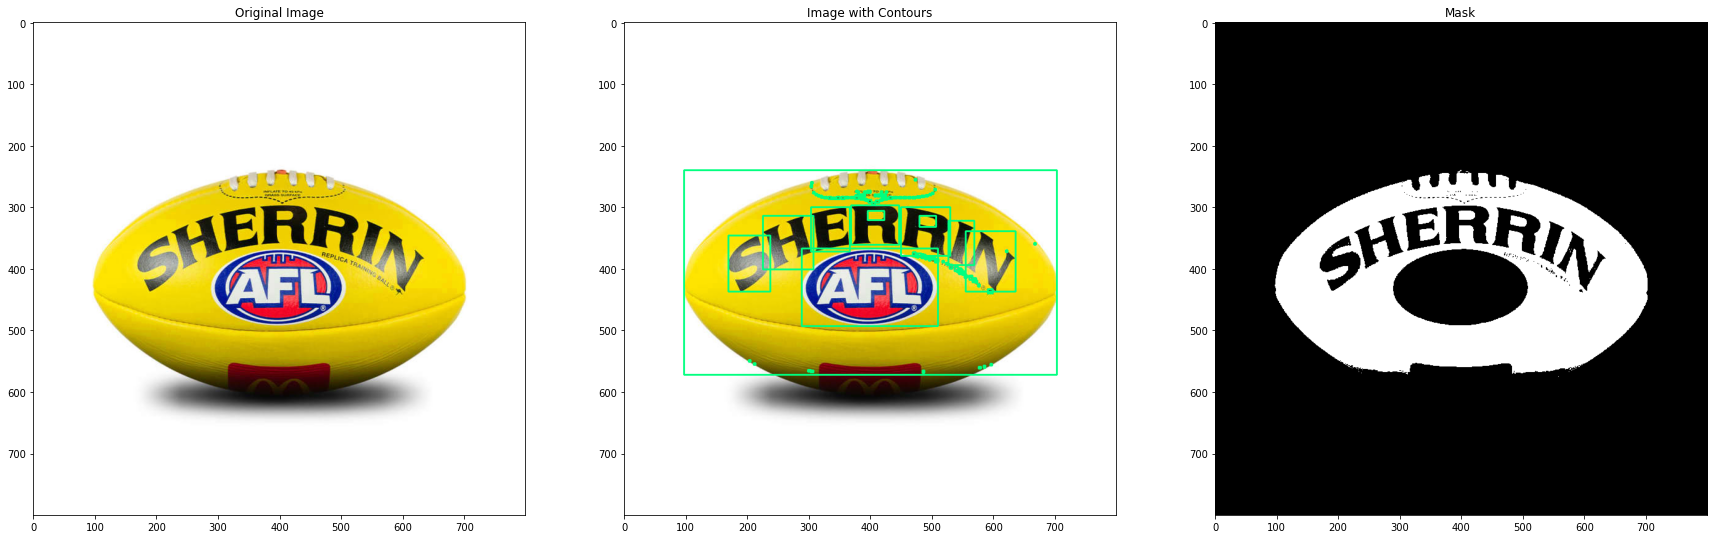

In [43]:
i_var_360_hsv_color_angle = 60
i_var_img_hsv = fun_get_image_180_hsv_from_rgb(i_var_img_resistor)

# This copy will get rectangles drawn on it
i_var_img_hsv_contours = np.copy(i_var_img_hsv)

i_var_180_hsv_range_lower_bound, i_var_180_hsv_range_upper_bound = fun_get_range_180_hsv_color_interval(i_var_360_hsv_color_angle)

i_var_contours, i_var_color_mask = fun_get_contours(
    i_var_img_hsv_contours,
    i_var_180_hsv_range_lower_bound,
    i_var_180_hsv_range_upper_bound
)

fun_show_img_contours_mask(
    i_var_img_hsv,
    i_var_img_hsv_contours,
    i_var_color_mask
)